Clustering Eval

In [93]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics


from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA 

from sklearn.decomposition import SparsePCA

import seaborn as sns

import numpy as np

from sklearn.metrics import accuracy_score


In [94]:
df = pd.read_csv('../data/processed/concatenated_data_cleaned_labeled_preprocessed_alt.csv') 


### Preprocessing of Descriptions Grouped by Bin Roles


In [95]:
by_role = df.groupby('bin_role')

'''Creates a dictionary called by_role_tokens where an aggregated list of tokens is saved for each bin role
NOTE: that desc_tokens should be a list of lists - one list of words per document'''

by_role_tokens = {}

for key, item in by_role:
    aggregated_tokens = []
    print(key)
    #print(item['desc_tokens'])
    desc_tokens = list(item['desc_tokens'])

    #for item2 in item['desc_tokens']:
        #aggregated_tokens = aggregated_tokens + item2
    by_role_tokens[key] = desc_tokens

Business Analyst
Data Analyst
Data Engineer
Data Scientist
ML/AI Researcher
Machine Learning Engineer
Software Engineer
Statistical Modeler/Researcher
Unclassified


In [96]:
def group_descriptions(by_role):
    '''Creates concatenated/joined text for job descriptions for each bin role'''
    roles = []
    merged_desc = []
    for key, items in by_role.indices.items():
        # concatenate strings in descriptions column (by search_role grouping) and append to list of merged descriptions
        string=(" ").join(description for description in df.loc[items,'new_description'])
        merged_desc.append(string)
        roles.append(key)

    return merged_desc, roles

In [97]:
'''descriptions variable is list of concatenated descriptions separated by bin role'''
descriptions, roles = group_descriptions(by_role)

In [98]:
# generate matrix of word vectors 

tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['new_description'])


In [99]:
y = df['bin_role']
X = text_tf
X.shape

(8880, 24577)

In [24]:
X_subset = X[:1000]
y_subset = y[:1000]

#### Using yellow brick's tSNE
https://www.scikit-yb.org/en/latest/api/text/tsne.html

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

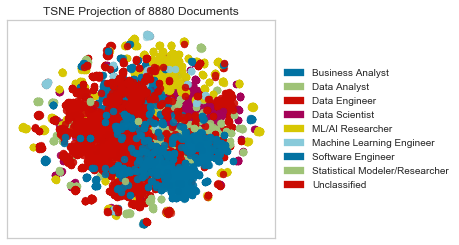

In [24]:
# labels = corpus.labels

tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.poof()

# tSNE 

https://www.youtube.com/watch?v=eDGWcIt10d8

In [108]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(X.toarray())

In [109]:
# creating a new data frame which helps us in plotting the result data 
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ("Dim_1", "Dim_2", "label"))


In [110]:
tsne_df.head()

,Dim_1,Dim_2,label
0,36.1442,-30.6202,Data Engineer
1,5.59249,-15.5393,Data Scientist
2,44.9996,-44.7729,Data Scientist
3,-18.9027,35.9377,Data Scientist
4,36.141,-1.80857,Data Scientist


/Users/ckato/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


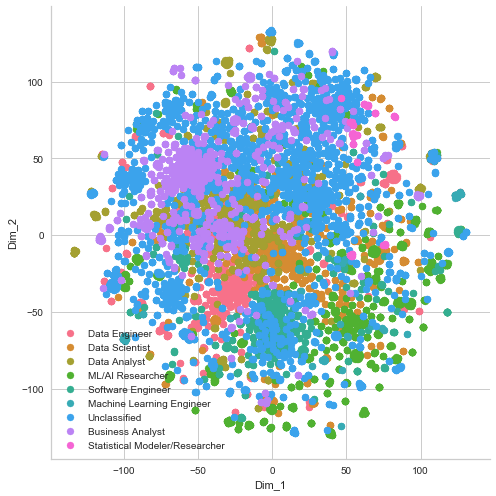

In [111]:
# Plotting the result of tsne

sns.FacetGrid(tsne_df, hue="label", size=7).map(plt.scatter, "Dim_1", "Dim_2")
plt.legend()
plt.show()

### On a Subset of the Data

In [ ]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(X.toarray())

# creating a new data frame which helps us in plotting the result data 
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ("Dim_1", "Dim_2", "label"))


In [33]:
tsne_df.head()

,Dim_1,Dim_2,label
0,-10.1831,-1.41923,Data Engineer
1,-18.858,6.45987,Data Scientist
2,-14.5986,-3.27496,Data Scientist
3,10.0908,35.9813,Data Scientist
4,-3.84964,-11.4731,Data Scientist


/Users/ckato/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


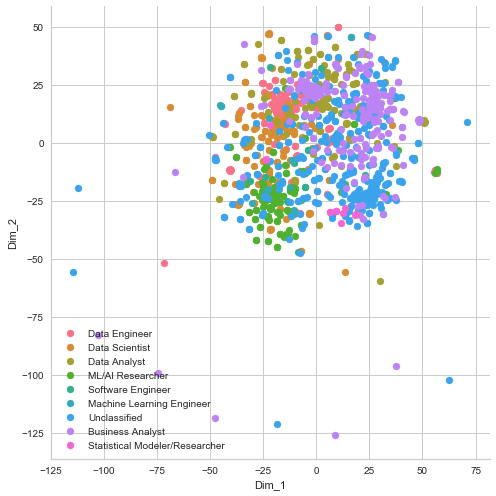

In [38]:
# Plotting the result of tsne

sns.FacetGrid(tsne_df, hue="label", size=7).map(plt.scatter, "Dim_1", "Dim_2")
plt.legend()
plt.show()

## K means means clustering


In [100]:
model = KMeans(n_clusters=9, random_state=1)
model.fit(X)
y_pred = model.predict(X)

In [101]:
centers = model.cluster_centers_


In [102]:
y = y.astype('category')
y_cat = y.cat.codes

In [103]:
'''Flatten data to 2 dimensions'''

transformer = SparsePCA(n_components=2,
         normalize_components=True,
         random_state=0)
transformer.fit(X.toarray()) 
sparse_pca_data = transformer.transform(X.toarray())

'''
# pca doesn't work on sparse matrices
pca = PCA(2)
pca.fit(X_subset)
pca_data=pd.DataFrame(pca.transform(X_subset))
'''

"\n# pca doesn't work on sparse matrices\npca = PCA(2)\npca.fit(X_subset)\npca_data=pd.DataFrame(pca.transform(X_subset))\n"

In [104]:
sparse_pca_centers=pd.DataFrame(transformer.transform(centers))


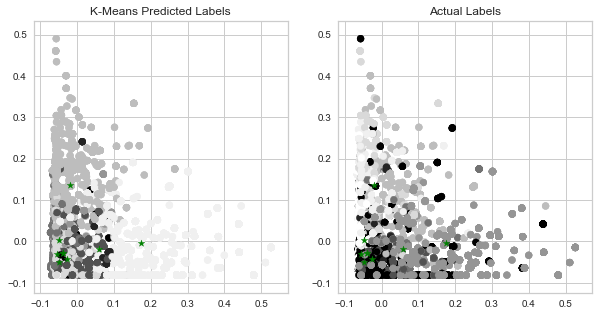

In [106]:
# TO plot predicted labels on labels ACROSS ALL columns: 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

xs = pd.DataFrame(sparse_pca_data).iloc[:, 0]
ys = pd.DataFrame(sparse_pca_data).iloc[:, 1]

ax1.scatter(xs, ys, c = y_pred)
ax1.set_title('K-Means Predicted Labels')
ax1.scatter(sparse_pca_centers[0], sparse_pca_centers[1], c='green', marker='*');


ax2.scatter(xs, ys, c = y_cat)
ax2.set_title('Actual Labels')
ax2.scatter(sparse_pca_centers[0], sparse_pca_centers[1], c='green', marker='*');



In [107]:
accuracy_score(y_cat, y_pred)

0.12072072072072072